In [38]:
!pip install -r requirements.txt

# Para usar la GPU del Mac M2
#!pip install tensorflow-macos
#!pip install tensorflow-metal


  Using cached jellyfish-0.9.0.tar.gz (132 kB)
  Preparing metadata (setup.py) ... done
  Using cached num2words-0.5.12-py3-none-any.whl (125 kB)
  Using cached plotly_express-0.4.1-py2.py3-none-any.whl (2.9 kB)
  Using cached pyDAWG-1.0.1.tar.gz (28 kB)
  Preparing metadata (setup.py) ... done
  Using cached pyLDAvis-3.4.0-py3-none-any.whl (2.6 MB)
  Using cached sklearn_crfsuite-0.3.6-py2.py3-none-any.whl (12 kB)
  Using cached stop-words-2018.7.23.tar.gz (31 kB)
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [5]:
# Descomprimo las reviews de videojuegos y obtengo un JSON
!gzip -d Video_Games.json.gz

Cada Review tiene:
{"overall": 1.0, "verified": true, "reviewTime": "06 9, 2014", "reviewerID": "A21ROB4YDOZA5P", "asin": "0439381673", "reviewerName": "Mary M. Clark", "reviewText": "I used to play this game years ago and loved it. I found this did not work on my computer even though it said it would work with Windows 7.", "summary": "Did not like this", "unixReviewTime": 1402272000}

In [2]:
import json

def obtener_diccionarios_desde_json(nombre_archivo):
    with open(nombre_archivo, "r") as archivo:
        lista_diccionarios = []
        for linea in archivo:
            diccionario = json.loads(linea)
            lista_diccionarios.append(diccionario)
        archivo.close()
        return lista_diccionarios

In [3]:
reviews = obtener_diccionarios_desde_json("Video_Games.json")

In [4]:
print(reviews[0])
print(len(reviews))

{'overall': 1.0, 'verified': True, 'reviewTime': '06 9, 2014', 'reviewerID': 'A21ROB4YDOZA5P', 'asin': '0439381673', 'reviewerName': 'Mary M. Clark', 'reviewText': 'I used to play this game years ago and loved it. I found this did not work on my computer even though it said it would work with Windows 7.', 'summary': 'Did not like this', 'unixReviewTime': 1402272000}
2565349


El campo "overall" representa la calificación general otorgada por el revisor al producto que está revisando en una escala de 1 a 5 estrellas.

Este campo es una variable numérica discreta que toma valores enteros del 1 al 5, donde 1 representa la peor calificación posible y 5 la mejor. Por lo tanto, el valor de "overall" indica la opinión general del revisor sobre el producto, siendo 5 la calificación más alta y 1 la más baja.

In [5]:
print(reviews[0])
print(reviews[1])
print(reviews[2])
print(reviews[3])
print(reviews[4])

{'overall': 1.0, 'verified': True, 'reviewTime': '06 9, 2014', 'reviewerID': 'A21ROB4YDOZA5P', 'asin': '0439381673', 'reviewerName': 'Mary M. Clark', 'reviewText': 'I used to play this game years ago and loved it. I found this did not work on my computer even though it said it would work with Windows 7.', 'summary': 'Did not like this', 'unixReviewTime': 1402272000}
{'overall': 3.0, 'verified': True, 'reviewTime': '05 10, 2014', 'reviewerID': 'A3TNZ2Q5E7HTHD', 'asin': '0439381673', 'reviewerName': 'Sarabatya', 'reviewText': 'The game itself worked great but the story line videos would never play, the sound was fine but the picture would freeze and go black every time.', 'summary': 'Almost Perfect', 'unixReviewTime': 1399680000}
{'overall': 4.0, 'vote': '15', 'verified': True, 'reviewTime': '02 7, 2014', 'reviewerID': 'A1OKRM3QFEATQO', 'asin': '0439381673', 'reviewerName': 'Amazon Customer', 'reviewText': "I had to learn the hard way after ordering this for my MacBook Pro that this does

In [6]:
import pandas as pd

#Creo el dataframe
#df = pd.DataFrame(reviews)

# Como no todos tienen reviewText, elimino los que no tengan
reviews_with_review_text = [d for d in reviews if 'reviewText' in d]

# Convierto a pandas
df = pd.DataFrame([{key: d[key] for key in ['overall', 'reviewText']} for d in reviews_with_review_text])


#df.dropna(subset=['review', 'sentiment'], inplace=True)
#df.reset_index(drop=True, inplace=True)

In [7]:
df.head()

,overall,reviewText
0,1.0,I used to play this game years ago and loved i...
1,3.0,The game itself worked great but the story lin...
2,4.0,I had to learn the hard way after ordering thi...
3,1.0,The product description should state this clea...
4,4.0,I would recommend this learning game for anyon...


In [8]:
text = df['reviewText']

In [9]:
len(text)

2563634

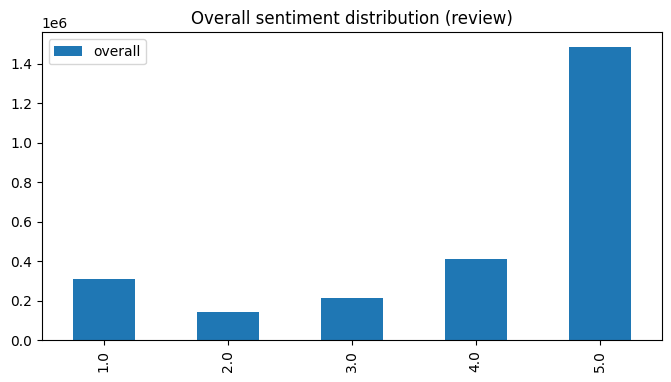

In [10]:
aux_df = pd.DataFrame(df['overall'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Overall sentiment distribution (review)', figsize=(8, 4))

In [17]:
# vemos que está muy desbalanceado, filtro con el valor mínimo
# Encontrar el número mínimo de registros
min_count = df['overall'].value_counts().min()
min_count

141306

In [18]:
min_count = int(min_count / 4)
min_count
# Cojo un cuarto de los registros porque si no la memoria falla

35326

In [19]:
# Balancear el dataframe, haciendo que todos tengan el mismo número de registros
balanced_df = pd.concat([group.sample(min_count) for _, group in df.groupby('overall')])
balanced_df.head()

,overall,reviewText
1282968,1.0,"EA, I would like a refund for this beta you so..."
2193594,1.0,"this is an amazing game from my childhood, it ..."
502837,1.0,I have two level 60 toons in less than two wee...
1029712,1.0,It's a poor continuance of the sword of the st...
1916094,1.0,Less than a month and it doesn't work keys kee...


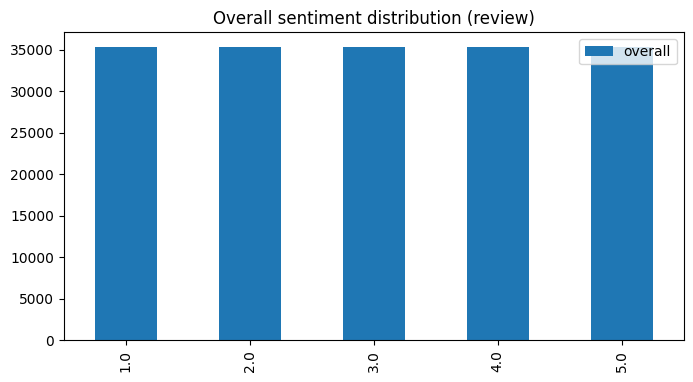

In [20]:
aux_df = pd.DataFrame(balanced_df['overall'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Overall sentiment distribution (review)', figsize=(8, 4))

In [21]:
text = balanced_df['reviewText']
splitted_reviews = text.str.lower().str.split()

In [22]:
words_stack = splitted_reviews.apply(pd.Series).stack()

In [23]:
words = words_stack.reset_index(drop = True)

In [24]:
from collections import Counter
import matplotlib.pyplot as plt

wf = Counter(words)
wf_most_common = wf.most_common(10)
wf_most_common

[('the', 872333),
 ('to', 427977),
 ('and', 417532),
 ('a', 392243),
 ('i', 371127),
 ('it', 277197),
 ('of', 273299),
 ('is', 266330),
 ('you', 216135),
 ('this', 211361)]

Número de tokens que componen el vocabulario 

In [25]:
len(wf)

318629

# N-grams más frecuentes

In [28]:
from nltk import ngrams # Exploración
from nltk.probability import FreqDist # Exploración

bigrams_ = ngrams(words, 2)
trigrams_ = ngrams(words, 3)

bigrams_freq_ = FreqDist(bigrams_)
trigrams_freq_ = FreqDist(trigrams_)

In [31]:
bg_freq_most_common = bigrams_freq_.most_common(10)
bg_freq_most_common

[(('of', 'the'), 74692),
 (('the', 'game'), 60809),
 (('this', 'game'), 50759),
 (('in', 'the'), 45788),
 (('if', 'you'), 36741),
 (('on', 'the'), 34580),
 (('is', 'a'), 33134),
 (('and', 'the'), 32344),
 (('to', 'the'), 31649),
 (('for', 'the'), 30219)]

In [32]:
tg_freq_most_common = trigrams_freq_.most_common(10)
tg_freq_most_common

[(('this', 'game', 'is'), 12892),
 (('a', 'lot', 'of'), 10157),
 (('the', 'game', 'is'), 9775),
 (('you', 'have', 'to'), 8235),
 (('this', 'is', 'a'), 7541),
 (('one', 'of', 'the'), 7144),
 (('of', 'the', 'game'), 5737),
 (('if', 'you', 'are'), 5456),
 (('some', 'of', 'the'), 5153),
 (('the', 'graphics', 'are'), 4662)]

In [33]:
bgs_ = [str(bg[0]) for bg in bg_freq_most_common]
bgs_f_ = [bg[1] for bg in bg_freq_most_common]

tgs_ = [str(tg[0]) for tg in tg_freq_most_common]
tgs_f_ = [tg[1] for tg in tg_freq_most_common]

In [34]:
bgs_f_, bgs_ = zip(*sorted(zip(bgs_f_, bgs_)))
tgs_f_, tgs_ = zip(*sorted(zip(tgs_f_, tgs_)))

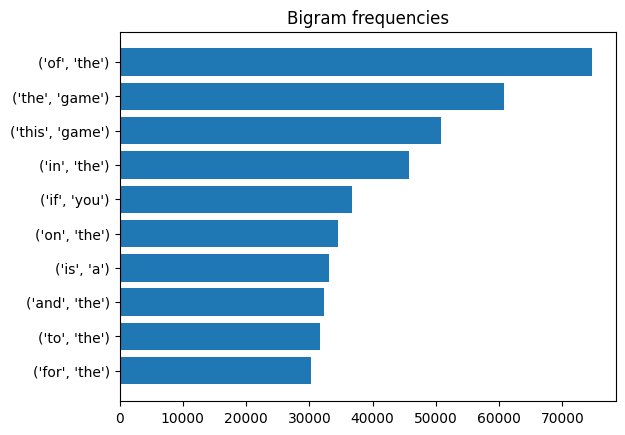

In [35]:
plt.barh(bgs_, bgs_f_)
plt.title('Bigram frequencies')
plt.show()

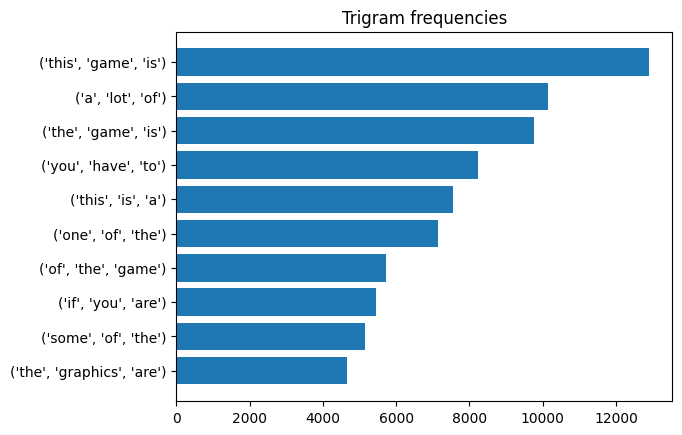

In [36]:
plt.barh(tgs_, tgs_f_)
plt.title('Trigram frequencies')
plt.show()

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(text))
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

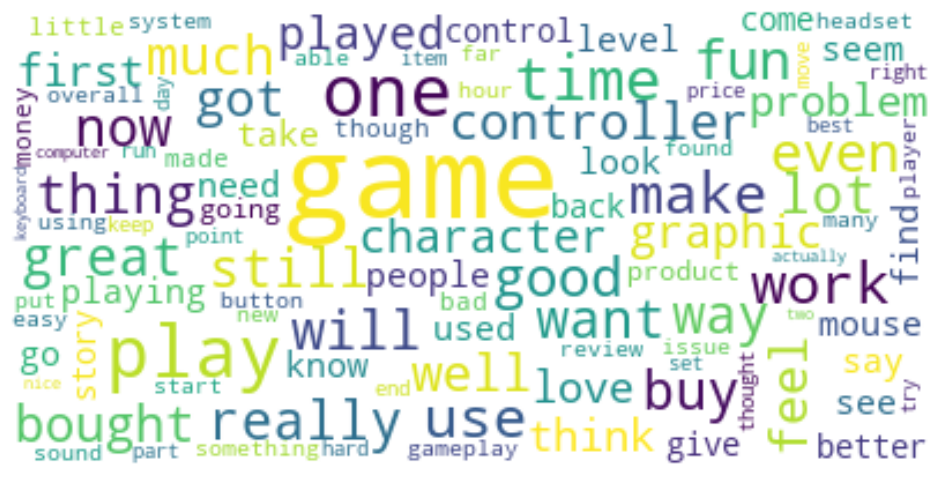

In [41]:
plot_word_cloud(words)

## Word2Vec

In [72]:
import multiprocessing

from gensim.models import Word2Vec
from time import time

cores = multiprocessing.cpu_count() # Contamos el número de cores en el ordenador
print (cores)

w2v_model = Word2Vec(min_count=100,
                     window=2,
                     vector_size=500,
                     sample=6e-3, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=100,
                     workers=cores-1)

t = time()
w2v_model.build_vocab(words, progress_per=10000)

print('Tiempo para construir el vocabulario: {} mins'.format(round((time() - t) / 60, 2)))

print('Vocabulario compuesto por {} palabras'.format(len(w2v_model.wv)))

8
Tiempo para construir el vocabulario: 0.1 mins
Vocabulario compuesto por 66 palabras


In [73]:
# Entrenar el modelo
t = time()

w2v_model.train(words, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 56.72 mins


In [66]:
w2v_model.save('./w2v_model.pkl')

In [74]:
w2v_model.wv.vectors

array([[ 0.47395557,  0.5261188 ,  0.91087866, ...,  0.9195001 ,
         0.45962206, -0.31236008],
       [-0.9586313 , -1.0304838 , -1.4582824 , ...,  0.7883211 ,
         0.46013647, -0.25818515],
       [ 0.50442785,  0.59695244,  1.6061246 , ...,  0.790842  ,
         0.2119166 ,  0.36005744],
       ...,
       [-0.5809666 , -0.07934712, -0.7118614 , ..., -0.23527889,
        -0.0867667 , -0.24778529],
       [-0.21897312,  1.3369305 , -0.08505382, ..., -1.292876  ,
        -0.33621368, -1.162295  ],
       [ 0.7329417 ,  0.96820265,  0.32508275, ..., -0.2293601 ,
        -0.31633663, -0.49481362]], dtype=float32)

In [75]:
words

0                      ea,
1                        i
2                    would
3                     like
4                        a
                 ...      
16080230             final
16080231           fantasy
16080232    titles...won't
16080233                be
16080234      disappointed
Length: 16080235, dtype: object

In [80]:
w2v_model.wv.most_similar("game")


KeyError: "Key 'game' not present"